# **24-788: Intro to Deep Learning by Prof. Amir Barati Farimani**

## **Spring 2024 | HW 4: CIFAR-10 Classification via CNNs**

For this assignment, you will follow the below steps:

```
1. First load and normalize the CIFAR-10 dataset.
2. Next, define your CNN model, loss function and optimizer.
3. Finally, once you have defined everything correctly, you can begin training your model.
4. For evaluation, you will need to test the model on test data and report your test accuracy.
5. Plot the model train and validation: loss and accuracy curves
```

Please referto the tutorial from PyTorch's official documentation: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html to get familiar with PyTorch, especially the data loading part. If you are new to PyTorch, it is recommended to follow the structure in this tutorial to build your model, loss function and training function. For this HW, $20$ out of $25$ points are graded on your code and report. And remaining $05$ points on the performance of your model. Tentative cutoffs for test accuracy:
1. $>$ $90\%$: $5$ points ($+10$ bonus points)
2. $>$ $85\%$: $5$ points ($+5$ bonus points)
3. $>$ $80\%$: $5$ points
4. $>$ $75\%$: $3$ points
5. $≤$ $75\%$: $0$ points

**NOTE:**
1. The below starter notebook follows the official PyTorch Documentation. You are free to make any changes to the sample starter notebook provided below.
2. You are recommended to use GPU. If you are training on GPU, please transfer your data and model to GPU Device: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-on-gpu)

In [1]:
# Import required libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Use the below code to get your Final Test Accuracy. DO NOT EDIT (except for changing device if needed)
def print_final_accuracy(model, testloader):
    total = 0
    correct = 0
    # we need to send the data to the same device as the data, so determine the
    # model's device
    device = next(model.parameters()).device
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    assert total == 10000, "Incorrect testloader used. There should be 10,000 test images"
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels= 3, out_channels= 32, kernel_size= 5, stride=  1, padding=  2)
        # TODO: Complete defining the init function of your CNN model
        self.cnn2 = nn.Conv2d(in_channels= 32, out_channels= 128, kernel_size= 5 , stride=  1, padding= 2)
        self.cnn3 = nn.Conv2d(in_channels= 128, out_channels= 256, kernel_size= 3 , stride=  1, padding= 1)
        self.cnn4 = nn.Conv2d(in_channels= 256, out_channels= 256, kernel_size= 3 , stride=  1, padding= 1)

        self.batch1 = nn.BatchNorm2d(32)
        self.batch2 = nn.BatchNorm2d(128)
        self.batch3 = nn.BatchNorm2d(256)
        self.batch4 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(kernel_size=4,stride=2)
        self.act = F.gelu
        self.dropout = nn.Dropout(p=0.5)

        self.fc1 = nn.Linear(256*6*6,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,10)

        self.batchfc1 = nn.BatchNorm1d(1024)
        self.batchfc2 = nn.BatchNorm1d(512)


    def forward(self, x):

        out = self.cnn1(x)
        # TODO: Complete defining your CNN model
        out = self.batch1(out)
        out = self.act(out)
        out = self.cnn2(out)
        out = self.batch2(out)
        out = self.act(out)
        out = self.pool(out)
        out = self.dropout(out)
        out = self.cnn3(out)
        out = self.batch3(out)
        out = self.act(out)
        out = self.cnn4(out)
        out = self.batch4(out)
        out = self.act(out)
        out = self.pool(out)
        out = self.dropout(out)


        out = torch.flatten(out,1)

        out = self.fc1(out)
        out = self.batchfc1(out)
        out = self.act(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.batchfc2(out)
        out=  self.act(out)
        out = self.dropout(out)
        out = self.fc3(out)

        return out

Files already downloaded and verified
Files already downloaded and verified
cuda:0
beginning training!
[1,   500] loss: 0.336
Training Accuracy after epoch 1: 56.50%
Validation Accuracy after epoch 1: 70.42%
[2,   500] loss: 0.215
Training Accuracy after epoch 2: 70.60%
Validation Accuracy after epoch 2: 73.13%
[3,   500] loss: 0.182
Training Accuracy after epoch 3: 74.75%
Validation Accuracy after epoch 3: 79.19%
[4,   500] loss: 0.161
Training Accuracy after epoch 4: 77.73%
Validation Accuracy after epoch 4: 80.77%
[5,   500] loss: 0.146
Training Accuracy after epoch 5: 79.48%
Validation Accuracy after epoch 5: 80.90%
[6,   500] loss: 0.134
Training Accuracy after epoch 6: 81.17%
Validation Accuracy after epoch 6: 82.66%
[7,   500] loss: 0.122
Training Accuracy after epoch 7: 82.66%
Validation Accuracy after epoch 7: 84.24%
[8,   500] loss: 0.114
Training Accuracy after epoch 8: 83.91%
Validation Accuracy after epoch 8: 83.49%
[9,   500] loss: 0.108
Training Accuracy after epoch 9: 8

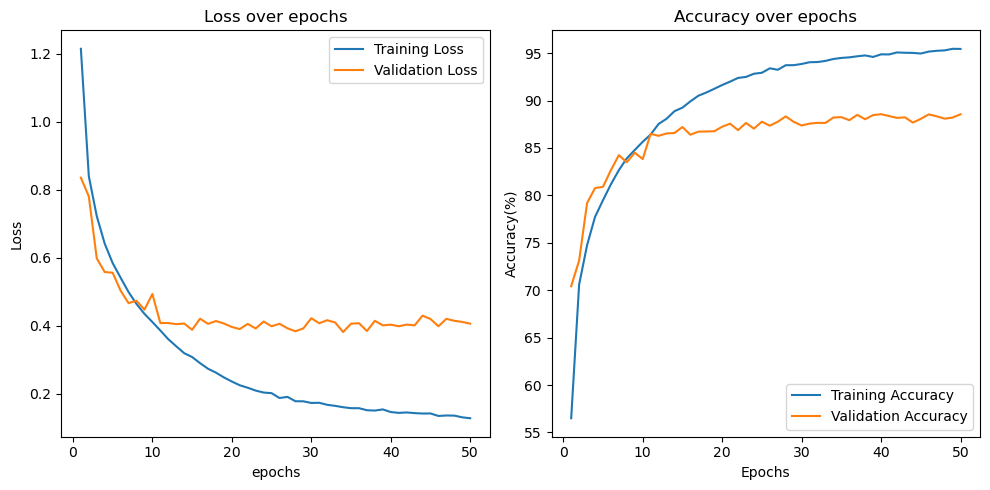

Accuracy of the network on the 10000 test images: 88 %


In [5]:
def main():
    # TODO: load and transform dataset

    train_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
    test_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
    trainset    =  torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
    trainloader =  torch.utils.data.DataLoader(trainset, batch_size=64, shuffle = True, num_workers=2)
    
    testset     =  torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
    testloader  =  torch.utils.data.DataLoader(testset, batch_size=64, shuffle = False, num_workers=2)
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)

    # TODO: Define your optimizer and criterion.
    model = CNN().to(device)
    criterion =    nn.CrossEntropyLoss()
    optimizer =    optim.Adam(model.parameters(), lr = 0.0005, weight_decay = 0.0001)
    num_epoch =    50

    # TODO: store loss over epochs for plot
    train_losses = []
    val_losses = []
    train_acc = []
    val_acc =[]


    print("beginning training!")
    for epoch in range(num_epoch):  # loop over the dataset multiple times
        running_loss = 0.0
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        model.train()
        for i, data in enumerate(trainloader, 0):
            # get the inputs and labels; send to device (if using GPU)
           inputs, labels = data
           inputs,labels = inputs.to(device),labels.to(device)


            # zero the parameter gradients
           optimizer.zero_grad()


            # forward + backward + optimize
           outputs = model(inputs)
           loss = criterion(outputs,labels)
           loss.backward()
           optimizer.step()


            # print statistics
           running_loss += loss.item()
           train_loss += loss.item()

           _, predicted = torch.max(outputs.data, 1)
           total_train += labels.size(0)
           correct_train += (predicted == labels).sum().item()

           #print(i)
           if i%500 == 499:
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
              running_loss = 0.0

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
           for data in testloader:
              inputs,labels = data
              inputs,labels = inputs.to(device),labels.to(device)

              outputs = model(inputs)
              loss = criterion(outputs,labels)
              val_loss += loss.item()

              _, predicted = torch.max(outputs.data,1)
              total_val += labels.size(0)
              correct_val += (predicted == labels).sum().item()

        print(f'Training Accuracy after epoch {epoch + 1}: {100*correct_train/total_train:.2f}%')
        print(f'Validation Accuracy after epoch {epoch + 1}: {100*correct_val/total_val:.2f}%')

        train_losses.append(train_loss/len(trainloader))
        val_losses.append(val_loss/len(testloader))
        train_acc.append(100*correct_train/total_train)
        val_acc.append(100*correct_val/total_val)


    print("Finished Training")
    torch.save(model.state_dict(), "./hw4_model.pkl")



    # plot the loss vs epoch
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(range(1,num_epoch+1),train_losses,label = "Training Loss")
    plt.plot(range(1,num_epoch+1),val_losses,label = "Validation Loss")
    plt.title("Loss over epochs")
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(1,num_epoch+1),train_acc,label = "Training Accuracy")
    plt.plot(range(1,num_epoch+1),val_acc,label = "Validation Accuracy")
    plt.title("Accuracy over epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy(%)")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # print final accuracy
    print_final_accuracy(model, testloader)

    # Print out the hyperparameters
    # Dicuss details of how you found the hyperparameters (what experiments you did?) with a brief explanation
    # Include it a markdown cell at the end of the assignment



if __name__ == "__main__":
  main()

Hyperparameters used were:

epochs = 50
learning rate = 0.0005
batch size = 64
weight decay = 0.0001
loss function = nn.CrossEntropyLoss()
optimizer = Adam


For the network, I used all the above hyperparameters with a cnn network architecture. The first architecture I used was from the given website to get an idea of the dataset and the model performance and then I increased the cnn architecture with 6 cnn and 5 linear. As I increased the model's complexity the architecture became very complex which led to the overfitting of the curve and gave me a low final accuracy. 

To solve that, I used a small cnn network of 4 layers with two cnn of kernel size = 2 and padding = 2 and for other two layers, I used kernel size of 1 and padding of 1 to reduce the complexity. I added pooling of kernel = (2,2) and stride of 2. For the linear layers I made the model architecture of 3 layers. For the whole architecture I used the activation function Gelu and also used dropout with a rate of 0.5. The epochs at this time were 40 and the other hyperparameters were same. The accuracy increased above 80 but to gain more accuracy, I decided to change the model a little more and added batch normalization to both cnn and linear layers which helped me in reaching an accuracy of 86%.

The final accuracy of the network for 10,000 images was calculated to be 88%.